<a href="https://colab.research.google.com/github/aghakishiyeva/Explainable-Techniques-II/blob/main/AIPI590_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in? Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/aghakishiyeva/Explainable-Techniques-II/tree/main)

### Install and Import Required Libraries

In [ ]:
!pip install pyALE matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.inspection import PartialDependenceDisplay
from PyALE import ale

### Load and Explore the Dataset

In [ ]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data['data']
df['target'] = data['target']

In [ ]:
# Display the first few rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Exploratory Data Analysis (EDA)

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


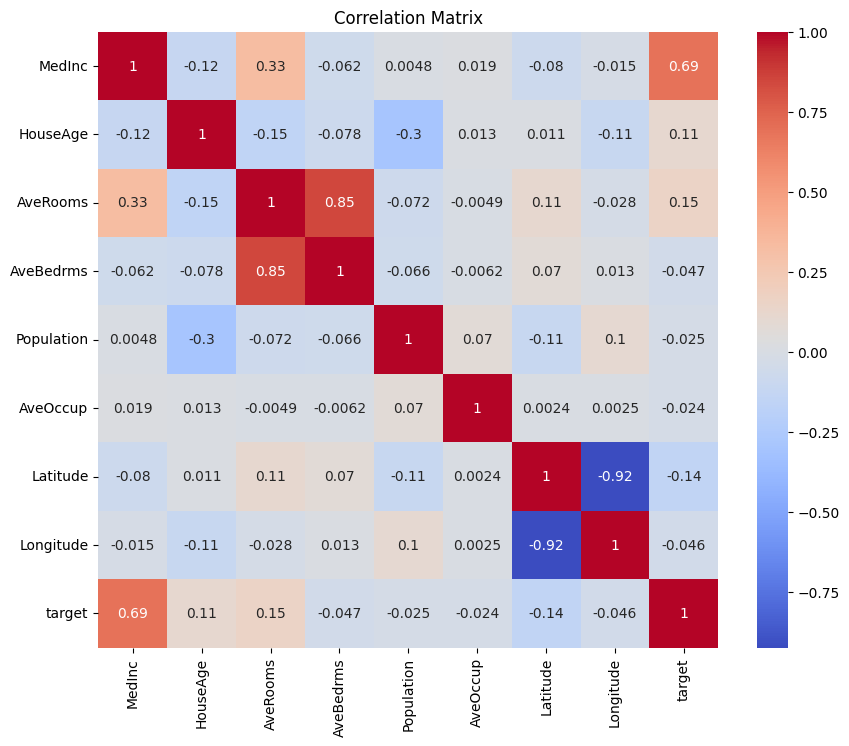

In [ ]:
# Correlation heatmap to identify relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

We see that Median Income (`MedInc`) is an important feature in the California Housing dataset because it strongly influences house prices, showing a clear and interpretable relationship. As a continuous variable, it reflects how income levels affect housing prices, which makes it a key driver in the housing market.

### Train a Simple Model (Random Forest)

In [ ]:
# Split the data into training and testing sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f"RMSE on the test set: {rmse}")

RMSE on the test set: 0.5053399773665033


### Partial Dependence Plot (PDP)

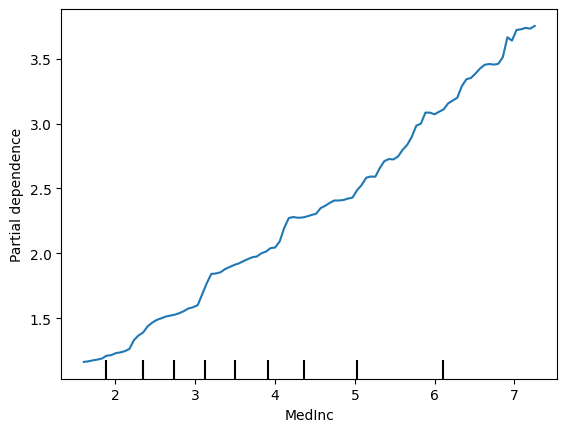

In [ ]:
# Create Partial Dependence Plot (PDP) for 'MedInc' feature
features = ['MedInc']
PartialDependenceDisplay.from_estimator(model, X_test, features)
plt.show()

The **Partial Dependence Plot (PDP)** for `MedInc` shows a positive, mostly linear relationship, indicating that house prices steadily increase as median income rises. This suggests that MedInc consistently influences the model's predictions, with higher incomes leading to higher predicted house prices.

### Individual Conditional Expectation (ICE) Plot

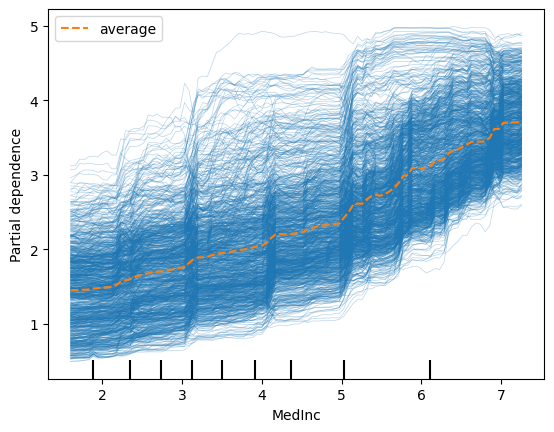

In [ ]:
# Create ICE plot for 'MedInc' feature
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='both')
plt.show()

The **ICE plot** for `MedInc` shows that while the overall effect of increasing median income on house prices is positive, individual data points exhibit varying responses, with some showing stronger or weaker effects. The variability in slopes suggests interactions between MedInc and other features in the model. Despite the differences, the average trend remains consistently upward, indicating a general increase in house prices with higher income levels.

### Accumulated Local Effects (ALE) Plot

INFO:PyALE._ALE_generic:Continuous feature detected.


              eff   size  lowerCI_95%  upperCI_95%
MedInc                                            
0.4999  -0.426145    0.0          NaN          NaN
1.6033  -0.610460  208.0    -0.647397    -0.573522
1.8849  -0.577261  205.0    -0.583495    -0.571027
2.1439  -0.537961  207.0    -0.544283    -0.531638
2.3456  -0.479822  206.0    -0.495812    -0.463832
2.5476  -0.425757  206.0    -0.438322    -0.413191
2.7388  -0.400575  207.0    -0.406887    -0.394263
2.9327  -0.359403  206.0    -0.366907    -0.351900
3.1194  -0.255613  206.0    -0.280690    -0.230537
3.2824  -0.209473  207.0    -0.228442    -0.190505
3.5000  -0.162684  213.0    -0.173739    -0.151630
3.6667  -0.131508  200.0    -0.141802    -0.121215
3.9076  -0.071247  206.0    -0.085087    -0.057406
4.1111   0.025964  206.0     0.006819     0.045109
4.3657   0.067022  206.0     0.052796     0.081248
4.6458   0.149447  207.0     0.137851     0.161043
5.0309   0.253620  206.0     0.240105     0.267136
5.4617   0.473378  206.0     0.

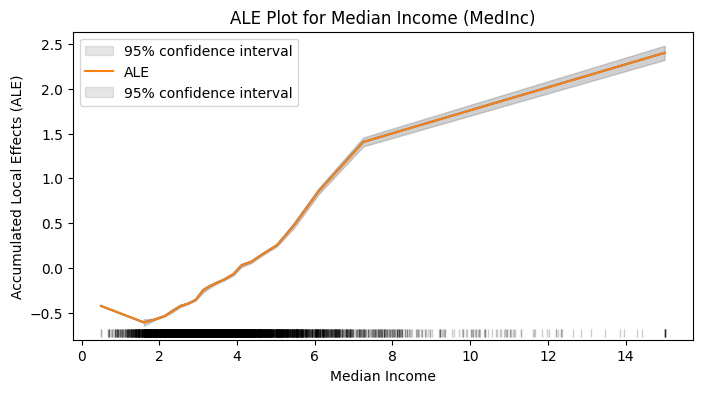

In [ ]:
# Create ALE plot for 'MedInc' feature

ale_eff = ale(
    X=X_test,                # Input test dataset
    model=model,             # Pass the model directly
    feature=["MedInc"],       # Feature for which you want to calculate ALE
    grid_size=20              # Number of intervals for calculating ALE
)

# Inspect the ALE results
print(ale_eff)

# Plot ALE for 'MedInc' using the 'eff' column and the index (MedInc values)
plt.plot(ale_eff.index, ale_eff['eff'], label='ALE')

# Plot the confidence intervals
plt.fill_between(ale_eff.index, ale_eff['lowerCI_95%'], ale_eff['upperCI_95%'], color='gray', alpha=0.2, label='95% confidence interval')

# Add labels and title
plt.title("ALE Plot for Median Income (MedInc)")
plt.xlabel("Median Income")
plt.ylabel("Accumulated Local Effects (ALE)")
plt.legend()
plt.show()

The **ALE (Accumulated Local Effects)** plot for `MedInc` shows a clear positive relationship between median income and house prices. Initially, there is a small negative effect when MedInc is low (around 1-2), but after that, the effect becomes consistently positive, with a steady increase in predicted house prices as income rises. The plot accounts for feature interactions, showing that MedInc has a strong influence on house prices, with more confidence in the effect at higher income levels, as indicated by the narrow confidence intervals.


> ***ChatGPT, developed by OpenAI, was used to generate content in this document.***


